In [1]:
#Array packages

import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc4

from scipy.stats import kendalltau
import pymannkendall as mk

#plots
import matplotlib.pyplot as plt
import rioxarray as rio
import geopandas as gpd
from shapely.geometry import mapping
import matplotlib.ticker as ticker
import cartopy.feature as cfeature
from matplotlib.patches import Circle
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
#Progress meter
from dask.diagnostics import ProgressBar
from tqdm import tqdm

# Directories
import os
import glob
import dask
#import h5netcdf
import scipy


#Trend
import xarrayMannKendall as XMK
import dask
from dask import delayed
import graphviz


import os
os.chdir(r"E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Research\1_Streamflow")
print(os.getcwd())

c:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\Research\1_Streamflow


### Trend seasonal 

In [ ]:
dw

In [ ]:
dw = xr.open_mfdataset(r'3_Data/Data_p/1_ILDAS/ILDAS_indices1.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})

index=['drt_flow','fld_flow']
ssn=['Pre-monsoon','Monsoon','Post-monsoon','Winter']
result=[]
for f in tqdm(index):
    for ss in range(4):

        ds=dw[flow]
        ds1=ds.sel(season=ss)
        ds1=ds1.rename({'year':'time', 'lon': 'x','lat': 'y'})
        
        MK_test = XMK.Mann_Kendall_test(ds1, 'time')
        xrr2=MK_test.compute()
        #xrr2['trend']=xrr2.trend.where(xrr2.signif==1,0)    #To REMOVE NON SIGNIFICANT POINTS
        result.append(xrr2)


<xarray.Dataset> Size: 238kB
Dimensions:    (y: 83, x: 89)
Coordinates:
  * x          (x) float64 712B 64.55 64.95 65.35 65.75 ... 98.95 99.35 99.75
  * y          (y) float64 664B 5.05 5.45 5.85 6.25 ... 36.65 37.05 37.45 37.85
Data variables:
    trend      (y, x) float64 59kB 0.0 0.0 0.0 0.0 ... 0.01514 0.05485 0.01714
    signif     (y, x) float64 59kB 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0 1.0
    p          (y, x) float64 59kB 1.0 1.0 1.0 ... 4.885e-15 2.043e-14 1.243e-14
    std_error  (y, x) float64 59kB 0.0 0.0 0.0 0.0 ... 0.003148 0.01205 0.00377

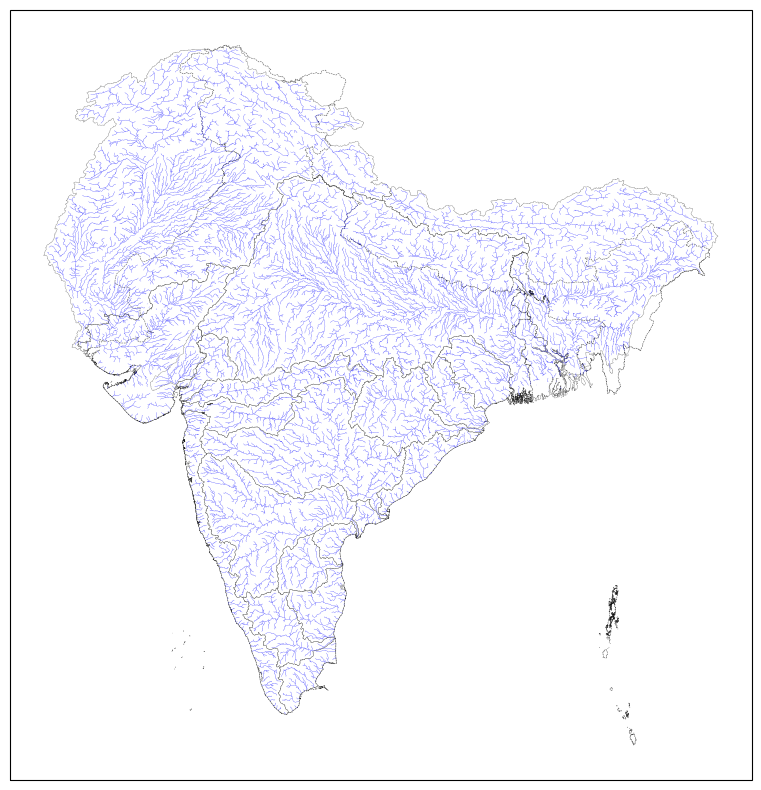

: 

In [3]:
num_colors = 50;marker_size = 6;marker_size2 = 5;alp = 0.1;alph = 0.05
basinEdge = 'black';basinEdge1 = 'blue';basinLine = 0.35


# Loading maps
guage_info=pd.read_csv(r"3_Data\Data_r\2_Streamflow\metadata.csv")
south_asia=gpd.read_file(r'3_Data\Data_p\3_Shapefiles\south_asia_p.shp')

basin_map = gpd.read_file('3_Data/DATA_r/3_shapefiles_new/IndiShape/IndShape.shp')
riv_map = gpd.read_file('3_Data/DATA_r/3_shapefiles_new/India_streams/India_stream.shp')
ind_map=gpd.read_file('3_Data/DATA_r/3_shapefiles_new/india_admin/Country/India_country.shp')


fig, ax1 = plt.subplots(1, 1, figsize=(10,10), subplot_kw={"projection": ccrs.PlateCarree()})

south_asia.plot(ax=ax1,color = 'none',edgecolor = basinEdge,linewidth=basinLine*0.5,alpha=0.7)
ind_map.plot(ax=ax1,color = 'none',linestyle='--',alpha=0.7,linewidth=basinLine)
riv_map.plot(ax=ax1,color = 'blue',alpha=0.8,linewidth=basinLine*0.5)
#xrr2['trend'].plot(ax=ax1,cmap='RdBu',vmin=-0.02,vmax=0.02)

c1=np.repeat(['white'],len(guage_info['Latitude']))
#ax1.scatter(guage_info['Longitude'],guage_info['Latitude'],c=c1,s=0.5)
# Add gridlines and titles for better readability




### Seasonal trend

In [ ]:

flow=['drt_flow','fld_flow']
ssn=['Pre-monsoon','Monsoon','Post-monsoon','Winter']


result=[]
for f in tqdm(flow):
    for ss in range(4):
        
        ds=dw[flow]
    
        ds1=ds.sel(season=ss)
        ds1=ds1.rename({'year':'time', 'lon': 'x','lat': 'y'})
        
        MK_test = XMK.Mann_Kendall_test(ds1, 'time')
        xrr2=MK_test.compute()
        #xrr2['trend']=xrr2.trend.where(xrr2.signif==1,0)    #To REMOVE NON SIGNIFICANT POINTS
        result.append(xrr2)

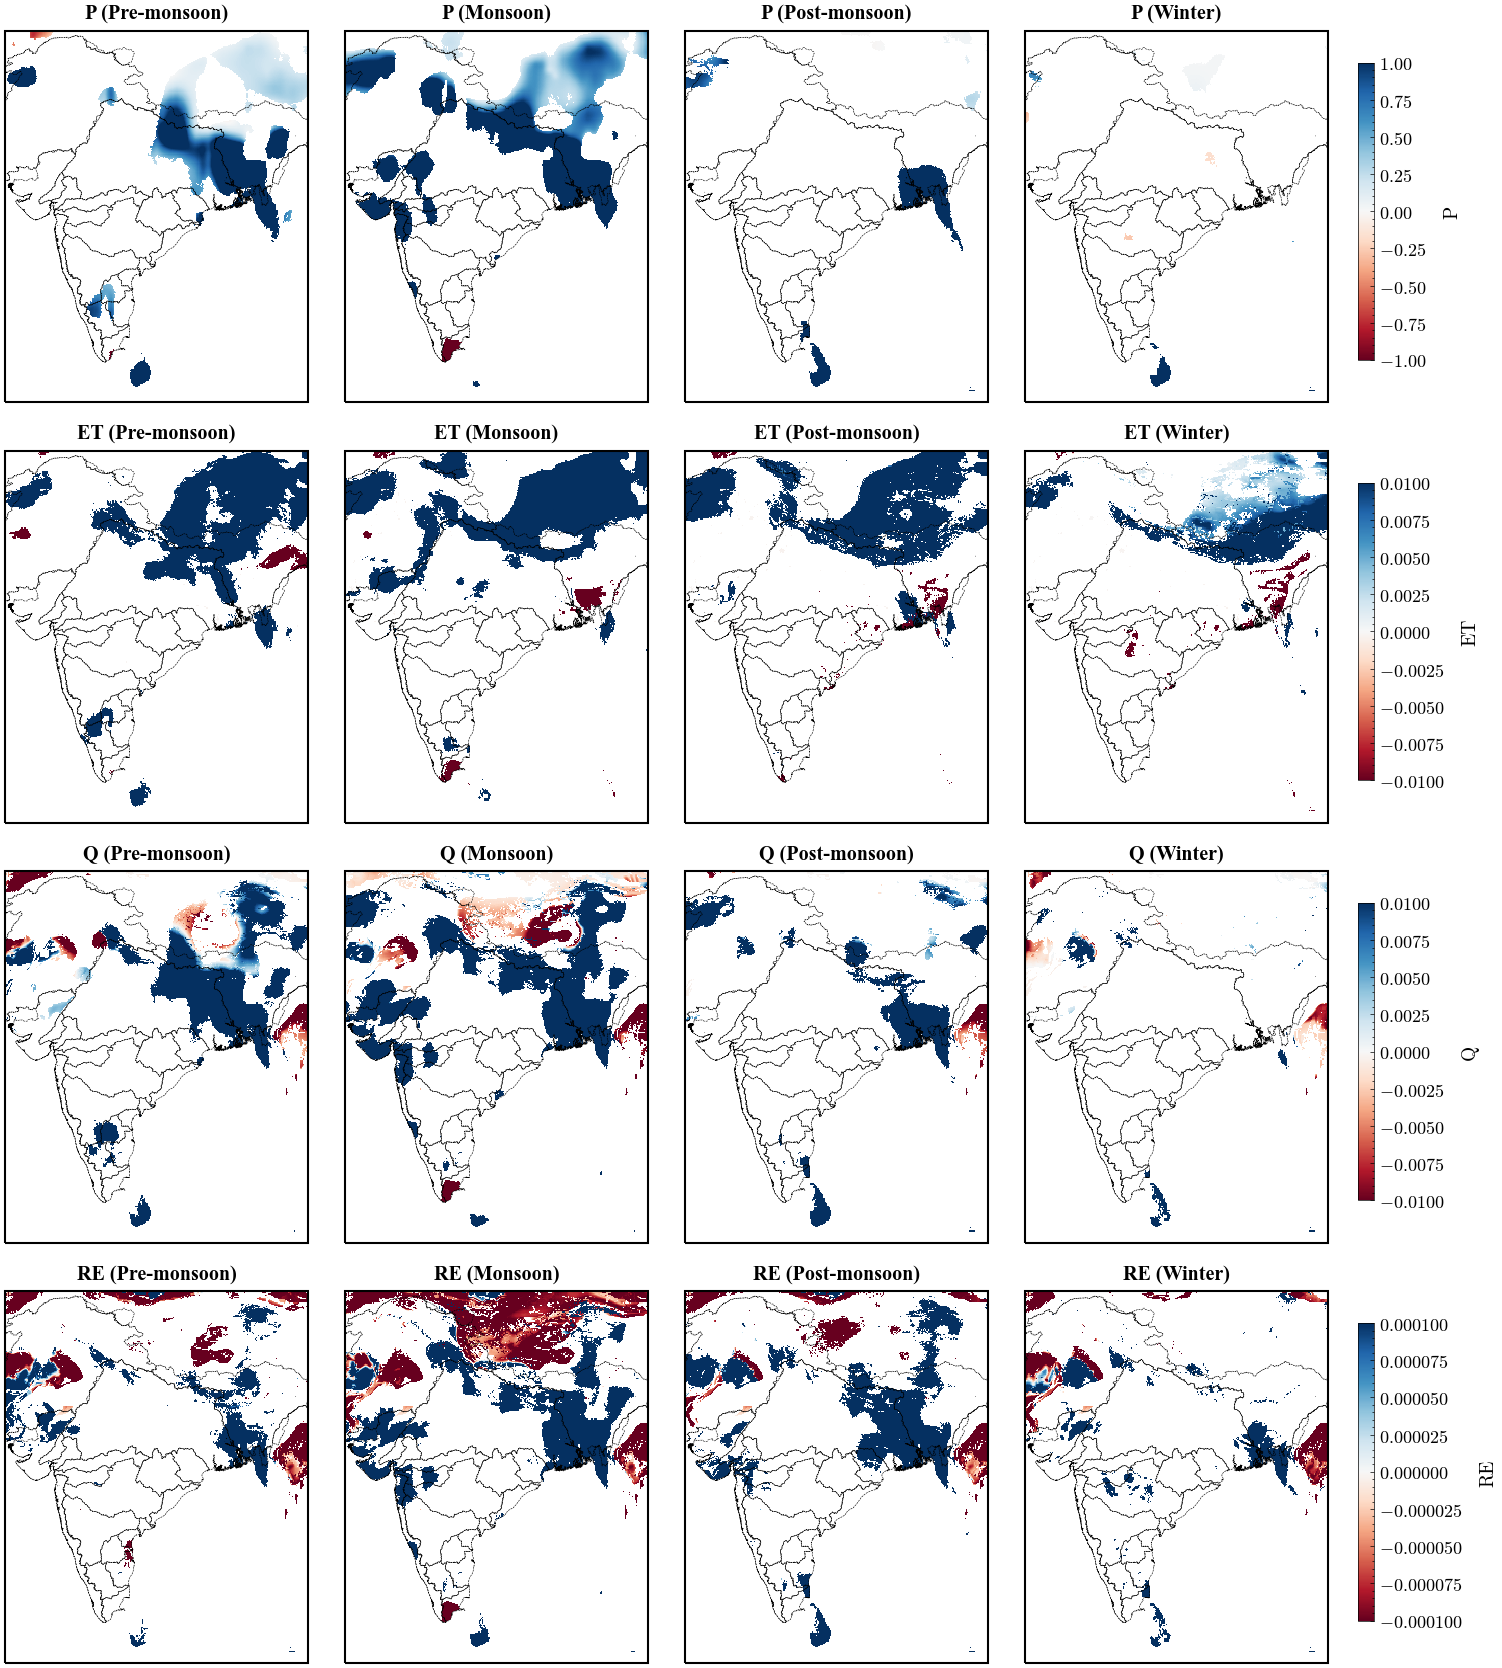

# Function